# 📌 Analiza podatności CVE z NVD API
### 🔍 Cel analizy
Celem tej analizy jest zbadanie podatności zgromadzonych w bazie NVD (National Vulnerability Database). Analiza obejmuje klasyfikację podatności według ich poziomu zagrożenia, trendów czasowych oraz aplikacji/systemów najbardziej narażonych na ataki.

### 🗃️ Rozmiar próbki
Dane zostały pobrane z API NVD, zawierają 2000 rekordów dotyczących podatności CVE (Common Vulnerabilities and Exposures).

### 📊 Plan analizy
Przegląd struktury danych – sprawdzenie pól, typów danych i ich poprawności.
Analiza poziomu zagrożenia – klasyfikacja podatności według CVSS (niski, średni, wysoki, krytyczny).
Trendy czasowe – wykres liczby podatności na przestrzeni lat.
Najbardziej podatne aplikacje/systemy – identyfikacja najbardziej narażonych technologii.
Eksport wyników – zapis przetworzonych danych do CSV lub bazy danych SQLite.
> ⚠️ Dane te są dynamiczne i mogą się zmieniać w czasie wraz z aktualizacją bazy NVD.

### 🔄 Etap 1: Pobranie danych z API NVD
W tym etapie łączymy się z API NVD i pobieramy dane dotyczące podatności CVE.

In [52]:
import requests

url = "https://services.nvd.nist.gov/rest/json/cves/2.0"
response = requests.get(url)

if response.status_code == 200:
    data = response.json()
    print("✅ Dane zostały pobrane poprawnie!")
else:
    print(f"❌ Błąd pobierania danych: {response.status_code}")
    data = None

✅ Dane zostały pobrane poprawnie!


### 📊 Etap 2: Konwersja danych do struktury DataFrame
Przetwarzamy dane JSON na strukturę tabelaryczną (DataFrame), aby łatwiej było je analizować.

In [53]:
import pandas as pd

def extract_cve_data(data):
    cve_list = []
    for item in data.get("vulnerabilities", []):
        cve = item.get("cve", {})
        cve_id = cve.get("id", "null")
        description = next((desc["value"] for desc in cve.get("descriptions", []) if desc["lang"] == "en"), "null")
        cvss_score = cve.get("metrics", {}).get("cvssMetricV2", [{}])[0].get("cvssData", {}).get("baseScore", None)
        published_date = cve.get("published", "null")
        cve_list.append([cve_id, description, cvss_score, published_date])
    return pd.DataFrame(cve_list, columns=["CVE ID", "Opis", "CVSS Score", "Data Publikacji"])

if data:
    df = extract_cve_data(data)
    print(df.head())

          CVE ID                                               Opis  \
0  CVE-1999-0095  The debug command in Sendmail is enabled, allo...   
1  CVE-1999-0082      CWD ~root command in ftpd allows root access.   
2  CVE-1999-1471  Buffer overflow in passwd in BSD based operati...   
3  CVE-1999-1122  Vulnerability in restore in SunOS 4.0.3 and ea...   
4  CVE-1999-1467  Vulnerability in rcp on SunOS 4.0.x allows rem...   

   CVSS Score          Data Publikacji  
0        10.0  1988-10-01T04:00:00.000  
1        10.0  1988-11-11T05:00:00.000  
2         7.2  1989-01-01T05:00:00.000  
3         4.6  1989-07-26T04:00:00.000  
4        10.0  1989-10-26T04:00:00.000  


### 📈 Etap 3: Wizualizacja danych
Tworzymy histogram przedstawiający rozkład wyników CVSS w pobranej próbce podatności.

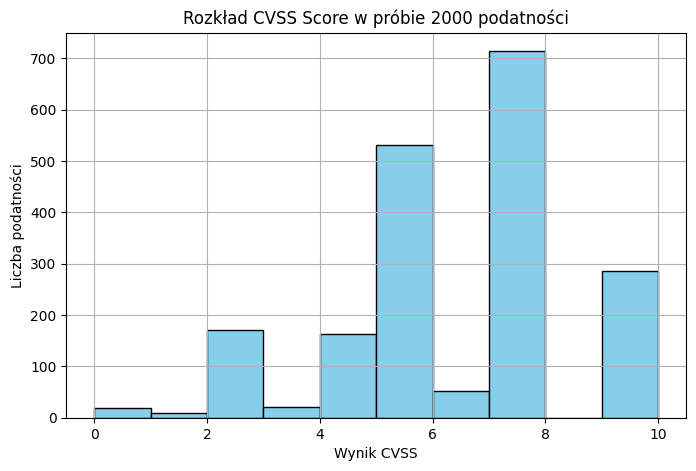

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df["CVSS Score"].dropna().astype(float).hist(bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Wynik CVSS")
plt.ylabel("Liczba podatności")
plt.title("Rozkład CVSS Score w próbie 2000 podatności")
plt.grid(True)
plt.show()

### 📝 Etap 4: Zapis danych do pliku CSV
Finalnie zapisujemy przetworzone dane do pliku CSV, aby móc je później analizować lub udostępniać.

In [55]:
df.to_csv("cve_data.csv", index=False)